In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

def MSD(t,D,V,taur):                    #Calculate the steplength
    return np.sqrt(4*D*t+V**2*taur**2/2*(2*t/taur+np.exp(-2*t/taur)-1))

plt.rcParams.update({'font.size': 14})

In [139]:
# rotate a 2D vector xy by an angle radians
def rotate(xy, radians):
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])

    return(float(m.T[0]), float(m.T[1]))

# generate the data of an active particle random walk
def genData_ap(N,_D,_Dr,_v,dt):
    v=np.random.random(2)
    v[0]=_v
    v[1]=0
    sigma=np.sqrt(2*_D*dt)
    sigma_r=np.sqrt(2*_Dr*dt)

    phi=sigma_r*randn(N).cumsum()
    vx,vy=[np.zeros(N),np.zeros(N)]
    vx[:],vy[:]=[v[0],v[1]]
    vv=np.array([rotate([vx[i],vy[i]],phi[i]) for i in range(len(phi))])

    #do the random walk
    x,y=[(sigma*randn(N)+vv[:,0]*dt).cumsum(),(sigma*randn(N)+vv[:,1]*dt).cumsum()]    

    index=[i for i in range(N)]
    df=pd.DataFrame({'x':x,'y':y,'area':np.zeros(N),'max_intensity':np.zeros(N),'frame': index,'angle': phi})
    return(df)

## Create a trajectory of  N=100000 for different reorientation time. Then calculate the average length of the step projected in the parallel direction

In [103]:
length = 100
savedata = np.zeros((length,2))
savedata[:,0] = np.linspace(0.65,2,length)

for i in range(length):  
    if i % 10 == 0: print('i = ',i)
    
    dt=0.05  # 50 ms time resolution
    v= 6   # 10 µm/s velocity
    D=3.85e-14*1e12#   # µm^2/s diffusion coefficient
    Dr=1/savedata[i,0]#1/0.65#D_R(1e-3,0.5e-6)   #  rad^2/s rotational diffusion
    N=100000 # number of steps

    # generate the trajectory and store it in a Pandas DataFrame
    dff=genData_ap(N,D,Dr,v,dt)

    # generate a list of unit vectors in the direction of the particle velocity
    uvec_par=np.array([np.cos(dff.angle),-np.sin(dff.angle)])[:,:-1]

    # generate a list of displacement vectors
    dr=np.array([dff.x.diff(1).dropna().values,dff.y.diff(1).dropna().values])

    # project the displacements on the unit vectors along the propulsion direction
    proj_par=np.sum(uvec_par*dr,axis=0)
    
    savedata[i,1] = np.mean(proj_par)

i =  0


KeyboardInterrupt: 

## Create fitting routine

In [220]:
def new(taur,A,B,F):    # if taur is varied
    return v*dt*(A-B/taur**F)

def new2(v,A,F):        #if v is varied
    return v*dt*(A-dt/taur**F)

def final(v,t,taur):    #final form of the fit function
    return v*t*(1-t/taur)

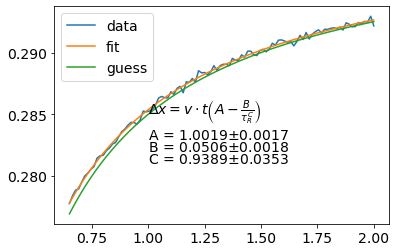

In [207]:
saveDdependence = savedata
plt.plot(saveDdependence[:,0],saveDdependence[:,1],label='data')
popt,pcov = curve_fit(new,saveDdependence[:,0], saveDdependence[:,1],p0 = (1,1,1))
pErr = np.sqrt(np.diag(pcov))
plt.plot(saveDdependence[:,0],new(saveDdependence[:,0],*popt),label='fit')

plt.text(1,0.285,r'$\Delta x = v \cdot t \left ( A-\frac{B}{\tau _{R}^{C}} \right )$')
plt.text(1,0.283,r'A = '+str(round(popt[0],4))+'$\pm$'+str(round(pErr[0],4)),size=14)
plt.text(1,0.282,r'B = '+str(round(popt[1],4))+'$\pm$'+str(round(pErr[1],4)),size=14)
plt.text(1,0.281,r'C = '+str(round(popt[2],4))+'$\pm$'+str(round(pErr[2],4)),size=14)

plt.plot(saveDdependence[:,0],new(saveDdependence[:,0],1,0.05,1),label='guess')
plt.legend()
plt.show()

## Create a trajectory of  N=100000 for different velocities. Then calculate the average length of the step projected in the parallel direction

In [108]:
length = 100
savedata2 = np.zeros((length,2))
savedata2[:,0] = np.linspace(2,6,length)

for i in range(length):  
    if i % 10 == 0: print('i = ',i)
    
    dt=0.05  # 50 ms time resolution
    v= savedata2[i,0]#6   # 10 µm/s velocity
    D=3.85e-14*1e12#   # µm^2/s diffusion coefficient
    taur = 1
    Dr=1/taur#1/savedata[i,0]#1/0.65#D_R(1e-3,0.5e-6)   #  rad^2/s rotational diffusion
    N=10000 # number of steps

    # generate the trajectory and store it in a Pandas DataFrame
    dff=genData_ap(N,D,Dr,v,dt)

    # generate a list of unit vectors in the direction of the particle velocity
    uvec_par=np.array([np.cos(dff.angle),-np.sin(dff.angle)])[:,:-1]

    # generate a list of displacement vectors
    dr=np.array([dff.x.diff(1).dropna().values,dff.y.diff(1).dropna().values])

    # project the displacements on the unit vectors along the propulsion direction
    proj_par=np.sum(uvec_par*dr,axis=0)
    
    savedata2[i,1] = np.mean(proj_par)

i =  0
i =  10
i =  20
i =  30
i =  40
i =  50
i =  60
i =  70
i =  80
i =  90


/Users/alex/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


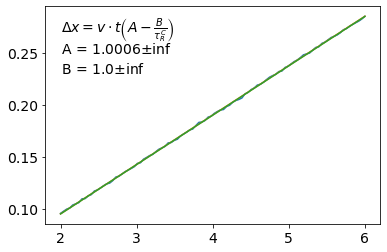

In [217]:
plt.plot(savedata2[:,0],savedata2[:,1])
popt,pcov = curve_fit(new2,savedata2[:,0], savedata2[:,1],p0 = (1,1))
pErr = np.sqrt(np.diag(pcov))
#plt.plot(savedata[:,0],func(savedata[:,0],0.2,1/2,0))
plt.plot(savedata2[:,0],new2(savedata2[:,0],*popt))
plt.text(2,0.27,r'$\Delta x = v \cdot t \left ( A-\frac{B}{\tau _{R}^{C}} \right )$')
plt.text(2,0.25,r'A = '+str(round(popt[0],4))+'$\pm$'+str(round(pErr[0],4)),size=14)
plt.text(2,0.23,r'B = '+str(round(popt[1],4))+'$\pm$'+str(round(pErr[1],4)),size=14)
#plt.text(2,0.21,r'C = '+str(round(popt[2],4))+'$\pm$'+str(round(pErr[2],4)),size=14)

plt.plot(savedata2[:,0],new2(savedata2[:,0],1,1))

## Check the stepsize in comparision to the old routine

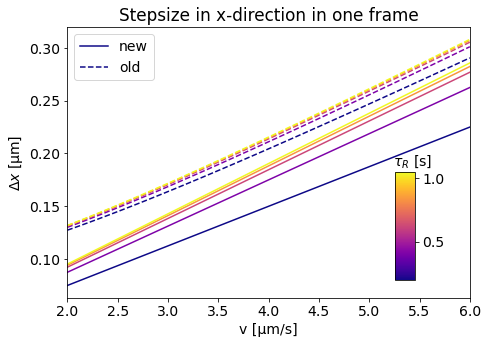

In [219]:
tauwave = [0.2,0.4,0.65,0.85,1.05]
length = len(tauwave)
vwave = np.linspace(2,6,100)
D_0 = 3.85e-14*1e12

colorwave = cm.plasma(np.linspace(0, 1, length))
fig, ax = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(1,1,1)
for i in range(length):
    if i == 0:
        ax1.plot(vwave,final(vwave,0.05,tauwave[i]),color=colorwave[i],label='new')  
        ax1.plot(vwave,MSD(0.05,D_0,vwave,tauwave[i]),color=colorwave[i],linestyle='--',label='old')
    else:
        ax1.plot(vwave,final(vwave,0.05,tauwave[i]),color=colorwave[i])  
        ax1.plot(vwave,MSD(0.05,D_0,vwave,tauwave[i]),color=colorwave[i],linestyle='--')
ax1.set_xlabel('v [µm/s]')
ax1.set_ylabel(r'$\Delta x$ [µm]')
ax1.set_title('Stepsize in x-direction in one frame')
ax1.set_xlim([vwave[0],vwave[-1]])
ax1.legend()

plt.tight_layout() 
data = np.linspace(tauwave[0], tauwave[-1], length).reshape(length, 1)
im = ax.imshow(data, cmap='plasma')       #plot the colorbar
divider = make_axes_locatable(ax1)
cax = fig.add_axes([0.8, 0.2, 0.04, 0.3])
plt.colorbar(im, cax=cax)
plt.text(0.1,1.1,r'$\tau_{R}$ [s]')

plt.savefig('Overview stepsize.pdf', format='pdf')
plt.savefig('Overview stepsize.svg', format='svg')
plt.show()

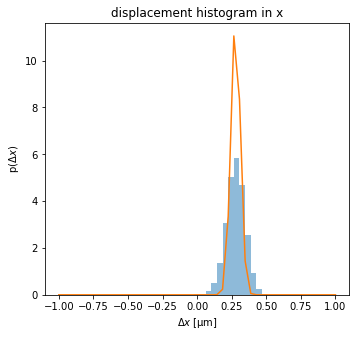

In [9]:
from scipy.stats import norm
xx=np.linspace(-1,1,50)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(proj_par,bins=xx,alpha=0.5,density=True)
plt.title('displacement histogram in x')
plt.xlabel('$\Delta x$ [µm]')
plt.ylabel('p($\Delta x$)')
plt.plot(xx, norm.pdf(xx,np.mean(proj_par),np.var(proj_par)/2/dt/np.sqrt(2)))

plt.show()